In [2]:
import chromatin_algos
import evaluator
import pyranges as pr
import pandas as pd
import pyreadr

In [3]:
df2 = pyreadr.read_r('../inputs/ATAC_dt.RDS')[None]
df2.rename(columns={"start": "Start", "end": "End", "seqnames": "Chromosome"}, inplace=True)
atac_ranges = pr.PyRanges(df2)
atac_ranges18 = atac_ranges[atac_ranges.Chromosome == '18']

In [5]:
atac_ranges.to_csv('../outputs/ATAC.tsv', sep="\t")

In [50]:
OUTPUT_RANGES_PATH = '../outputs/ATAC.tsv'
GENE_DATA_PATH = '../inputs/gencode_chr18.gtf'
TARGET_GENE_NAME = 'Tmx3'

ranges = pd.read_csv(OUTPUT_RANGES_PATH, sep='\t')
genes = pr.read_gtf(GENE_DATA_PATH)
genes = genes[genes.Feature == 'gene']

In [51]:
print(genes.tail(200))

+--------------+------------+--------------+-----------+-----------+------------+--------------+------------+-----------------------+----------------------+--------------------+------------+-----------------+-------------------+-------------------+------------+---------------+-------+
| Chromosome   | Source     | Feature      | Start     | End       | Score      | Strand       | Frame      | gene_id               | gene_type            | gene_name          | level      | transcript_id   | transcript_type   | transcript_name   | tag        | exon_number   | +8    |
| (category)   | (object)   | (category)   | (int64)   | (int64)   | (object)   | (category)   | (object)   | (object)              | (object)             | (object)           | (object)   | (object)        | (object)          | (object)          | (object)   | (object)      | ...   |
|--------------+------------+--------------+-----------+-----------+------------+--------------+------------+-----------------------+---------

/opt/anaconda3/lib/python3.12/site-packages/pyranges/tostring2.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([plus, minus])
/opt/anaconda3/lib/python3.12/site-packages/pyranges/tostring2.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([plus, minus])
/opt/anaconda3/lib/python3.12/site-packages/pyranges/tostring2.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longe

In [59]:
genes_df = genes.df
#genes_df = genes_df[genes_df["gene_name"] == TARGET_GENE_NAME]
gene_ranges = pr.PyRanges(genes_df)
gene_ranges.Chromosome = '18'
print(gene_ranges)

+--------------+------------+--------------+-----------+-----------+------------+--------------+------------+----------------------+----------------------+--------------------+------------+-----------------+-------------------+-------------------+------------+---------------+------------+-------+
| Chromosome   | Source     | Feature      | Start     | End       | Score      | Strand       | Frame      | gene_id              | gene_type            | gene_name          | level      | transcript_id   | transcript_type   | transcript_name   | tag        | exon_number   | exon_id    | +7    |
| (category)   | (object)   | (category)   | (int64)   | (int64)   | (object)   | (category)   | (object)   | (object)             | (object)             | (object)           | (object)   | (object)        | (object)          | (object)          | (object)   | (object)      | (object)   | ...   |
|--------------+------------+--------------+-----------+-----------+------------+--------------+----------

In [60]:
overlap_dict = {'gene':gene_ranges, 'ranges':atac_ranges}
overlaps = pr.count_overlaps(overlap_dict)
overlaps_df = overlaps.df
overlapping_genes = pr.PyRanges(overlaps_df[(overlaps_df['gene'] != 0)])
print("TARGET_GENE_NAME:", TARGET_GENE_NAME)
print("OUTPUT_RANGES_PATH:", OUTPUT_RANGES_PATH)
print(overlapping_genes)

/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 2 1 ... 1 2 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatib

TARGET_GENE_NAME: Tmx3
OUTPUT_RANGES_PATH: ../outputs/ATAC.tsv
+--------------+-----------+-----------+-----------+-----------+
| Chromosome   | Start     | End       | gene      | ranges    |
| (category)   | (int64)   | (int64)   | (int64)   | (int64)   |
|--------------+-----------+-----------+-----------+-----------|
| 18           | 3000072   | 3005664   | 1         | 0         |
| 18           | 3005664   | 3006104   | 2         | 0         |
| 18           | 3006104   | 3010774   | 1         | 0         |
| 18           | 3015907   | 3016159   | 1         | 0         |
| ...          | ...       | ...       | ...       | ...       |
| 18           | 90559342  | 90561391  | 1         | 0         |
| 18           | 90597900  | 90603595  | 1         | 0         |
| 18           | 90603595  | 90603989  | 2         | 0         |
| 18           | 90603989  | 90610652  | 1         | 0         |
+--------------+-----------+-----------+-----------+-----------+
Unstranded PyRanges object 

In [61]:
overlap_dict = {'gene':gene_ranges, 'ranges':atac_ranges}
overlaps = pr.count_overlaps(overlap_dict)
overlaps_df = overlaps.df
overlapping_genes = pr.PyRanges(overlaps_df[(overlaps_df['gene'] != 0) & (overlaps_df['ranges'] != 0)])
print("TARGET_GENE_NAME:", TARGET_GENE_NAME)
print("OUTPUT_RANGES_PATH:", OUTPUT_RANGES_PATH)
print(overlapping_genes)

TARGET_GENE_NAME: Tmx3
OUTPUT_RANGES_PATH: ../outputs/ATAC.tsv
+--------------+-----------+-----------+-----------+-----------+
| Chromosome   | Start     | End       | gene      | ranges    |
| (category)   | (int64)   | (int64)   | (int64)   | (int64)   |
|--------------+-----------+-----------+-----------+-----------|
| 18           | 3280837   | 3281100   | 1         | 1         |
| 18           | 3336875   | 3337748   | 2         | 1         |
| 18           | 3337748   | 3337865   | 1         | 1         |
| 18           | 3382987   | 3383314   | 1         | 1         |
| ...          | ...       | ...       | ...       | ...       |
| 18           | 89830892  | 89831202  | 1         | 1         |
| 18           | 89845553  | 89845706  | 1         | 1         |
| 18           | 90545878  | 90546161  | 1         | 1         |
| 18           | 90559238  | 90559342  | 1         | 1         |
+--------------+-----------+-----------+-----------+-----------+
Unstranded PyRanges object 

/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 2 1 ... 1 2 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatib

In [62]:
print(gene_ranges['18', 3382987:3383314])

+--------------+------------+--------------+-----------+-----------+------------+--------------+------------+-----------------------+----------------+-------------+------------+-----------------+-------------------+-------------------+------------+---------------+------------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | Score      | Strand       | Frame      | gene_id               | gene_type      | gene_name   |      level |   transcript_id |   transcript_type |   transcript_name |        tag |   exon_number |    exon_id | +7    |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | (object)   | (category)   | (object)   | (object)              | (object)       | (object)    |   (object) |        (object) |          (object) |          (object) |   (object) |      (object) |   (object) | ...   |
|--------------+------------+--------------+-----------+-----------+------------+--------------+------------+-----------------------+---------

In [1]:
import gene_analysis
import pandas as pd

In [17]:
result = gene_analysis.get_expression_data('Tet1', '10', 'S1')

gene_chr = [('Sox2', '3'), ('Pou5f1', '17'), ('Nanog', '6'), ('Tet1', '10'), ('Pax6', '2'), ('Sox11', '12')]

for stage in ['S0', 'S1', 'S2']:
    for (gene, chr) in gene_chr:
        out = gene_analysis.get_expression_data(gene, chr, stage)
        result = pd.concat([result, out])


print(result)

+--------------+-----------+-----------+
| Chromosome   | Start     | End       |
| (category)   | (int64)   | (int64)   |
|--------------+-----------+-----------|
| 10           | 3310806   | 3310881   |
| 10           | 3333051   | 3333141   |
| 10           | 3335746   | 3335841   |
| 10           | 3366091   | 3366351   |
| ...          | ...       | ...       |
| 10           | 130542226 | 130542371 |
| 10           | 130542471 | 130542606 |
| 10           | 130543291 | 130543371 |
| 10           | 130592861 | 130592941 |
+--------------+-----------+-----------+
Unstranded PyRanges object has 14,784 rows and 3 columns from 1 chromosomes.
For printing, the PyRanges was sorted on Chromosome.


/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values




TARGET_GENE_NAME: Tet1
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+--------------+-----------+-----------+-------|
|           10 | HAVANA     | gene         |  62804569 |  62908996 | ...   |
+--------------+------------+--------------+-----------+-----------+-------+
Unstranded PyRanges object has 1 rows and 25 columns from 1 chromosomes.
For printing, the PyRanges was sorted on Chromosome.
20 hidden columns: Score, Strand, Frame, gene_id, gene_type, gene_name, level, ... (+ 13 more.)


GENE_NEIGHBOURHOOD: Tet1
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+----

/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 1 1 1 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values




TARGET_GENE_NAME: Sox2
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+--------------+-----------+-----------+-------|
|            3 | HAVANA     | gene         |  34650404 |  34652461 | ...   |
+--------------+------------+--------------+-----------+-----------+-------+
Unstranded PyRanges object has 1 rows and 25 columns from 1 chromosomes.
For printing, the PyRanges was sorted on Chromosome.
20 hidden columns: Score, Strand, Frame, gene_id, gene_type, gene_name, level, ... (+ 13 more.)


GENE_NEIGHBOURHOOD: Sox2
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+----

/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 1 1 1 1 1 1 1 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values




TARGET_GENE_NAME: Pou5f1
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+--------------+-----------+-----------+-------|
|           17 | HAVANA     | gene         |  35506017 |  35510772 | ...   |
+--------------+------------+--------------+-----------+-----------+-------+
Unstranded PyRanges object has 1 rows and 25 columns from 1 chromosomes.
For printing, the PyRanges was sorted on Chromosome.
20 hidden columns: Score, Strand, Frame, gene_id, gene_type, gene_name, level, ... (+ 13 more.)


GENE_NEIGHBOURHOOD: Pou5f1
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+

/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 1 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values




TARGET_GENE_NAME: Nanog
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+--------------+-----------+-----------+-------|
|            6 | HAVANA     | gene         | 122707488 | 122714633 | ...   |
+--------------+------------+--------------+-----------+-----------+-------+
Unstranded PyRanges object has 1 rows and 25 columns from 1 chromosomes.
For printing, the PyRanges was sorted on Chromosome.
20 hidden columns: Score, Strand, Frame, gene_id, gene_type, gene_name, level, ... (+ 13 more.)


GENE_NEIGHBOURHOOD: Nanog
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+--

/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values




TARGET_GENE_NAME: Tet1
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+--------------+-----------+-----------+-------|
|           10 | HAVANA     | gene         |  62804569 |  62908996 | ...   |
+--------------+------------+--------------+-----------+-----------+-------+
Unstranded PyRanges object has 1 rows and 25 columns from 1 chromosomes.
For printing, the PyRanges was sorted on Chromosome.
20 hidden columns: Score, Strand, Frame, gene_id, gene_type, gene_name, level, ... (+ 13 more.)


GENE_NEIGHBOURHOOD: Tet1
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+----

/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 1 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values




TARGET_GENE_NAME: Pax6
+--------------+------------+------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature    |     Start |       End | +20   |
|   (category) | (object)   | (object)   |   (int64) |   (int64) | ...   |
|--------------+------------+------------+-----------+-----------+-------|
|            2 | HAVANA     | gene       | 105668899 | 105697364 | ...   |
+--------------+------------+------------+-----------+-----------+-------+
Unstranded PyRanges object has 1 rows and 25 columns from 1 chromosomes.
For printing, the PyRanges was sorted on Chromosome.
20 hidden columns: Score, Strand, Frame, gene_id, gene_type, gene_name, level, ... (+ 13 more.)


GENE_NEIGHBOURHOOD: Pax6
+--------------+------------+------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature    |     Start |       End | +20   |
|   (category) | (object)   | (object)   |   (int64) |   (int64) | ...   |
|--------------+------------+------------+---------

/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 1 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values




TARGET_GENE_NAME: Sox11
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+--------------+-----------+-----------+-------|
|           12 | HAVANA     | gene         |  27334263 |  27342574 | ...   |
+--------------+------------+--------------+-----------+-----------+-------+
Unstranded PyRanges object has 1 rows and 25 columns from 1 chromosomes.
For printing, the PyRanges was sorted on Chromosome.
20 hidden columns: Score, Strand, Frame, gene_id, gene_type, gene_name, level, ... (+ 13 more.)


GENE_NEIGHBOURHOOD: Sox11
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+--

/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 1 1 1 1 1 1 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values




TARGET_GENE_NAME: Sox2
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+--------------+-----------+-----------+-------|
|            3 | HAVANA     | gene         |  34650404 |  34652461 | ...   |
+--------------+------------+--------------+-----------+-----------+-------+
Unstranded PyRanges object has 1 rows and 25 columns from 1 chromosomes.
For printing, the PyRanges was sorted on Chromosome.
20 hidden columns: Score, Strand, Frame, gene_id, gene_type, gene_name, level, ... (+ 13 more.)


GENE_NEIGHBOURHOOD: Sox2
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+----

/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values




TARGET_GENE_NAME: Pou5f1
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+--------------+-----------+-----------+-------|
|           17 | HAVANA     | gene         |  35506017 |  35510772 | ...   |
+--------------+------------+--------------+-----------+-----------+-------+
Unstranded PyRanges object has 1 rows and 25 columns from 1 chromosomes.
For printing, the PyRanges was sorted on Chromosome.
20 hidden columns: Score, Strand, Frame, gene_id, gene_type, gene_name, level, ... (+ 13 more.)


GENE_NEIGHBOURHOOD: Pou5f1
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+

/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values




TARGET_GENE_NAME: Nanog
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+--------------+-----------+-----------+-------|
|            6 | HAVANA     | gene         | 122707488 | 122714633 | ...   |
+--------------+------------+--------------+-----------+-----------+-------+
Unstranded PyRanges object has 1 rows and 25 columns from 1 chromosomes.
For printing, the PyRanges was sorted on Chromosome.
20 hidden columns: Score, Strand, Frame, gene_id, gene_type, gene_name, level, ... (+ 13 more.)


GENE_NEIGHBOURHOOD: Nanog
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+--

/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values




TARGET_GENE_NAME: Tet1
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+--------------+-----------+-----------+-------|
|           10 | HAVANA     | gene         |  62804569 |  62908996 | ...   |
+--------------+------------+--------------+-----------+-----------+-------+
Unstranded PyRanges object has 1 rows and 25 columns from 1 chromosomes.
For printing, the PyRanges was sorted on Chromosome.
20 hidden columns: Score, Strand, Frame, gene_id, gene_type, gene_name, level, ... (+ 13 more.)


GENE_NEIGHBOURHOOD: Tet1
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+----

/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 1 1 1 1 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values




TARGET_GENE_NAME: Pax6
+--------------+------------+------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature    |     Start |       End | +20   |
|   (category) | (object)   | (object)   |   (int64) |   (int64) | ...   |
|--------------+------------+------------+-----------+-----------+-------|
|            2 | HAVANA     | gene       | 105668899 | 105697364 | ...   |
+--------------+------------+------------+-----------+-----------+-------+
Unstranded PyRanges object has 1 rows and 25 columns from 1 chromosomes.
For printing, the PyRanges was sorted on Chromosome.
20 hidden columns: Score, Strand, Frame, gene_id, gene_type, gene_name, level, ... (+ 13 more.)


GENE_NEIGHBOURHOOD: Pax6
+--------------+------------+------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature    |     Start |       End | +20   |
|   (category) | (object)   | (object)   |   (int64) |   (int64) | ...   |
|--------------+------------+------------+---------

/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 1 1 1 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values




TARGET_GENE_NAME: Sox11
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+--------------+-----------+-----------+-------|
|           12 | HAVANA     | gene         |  27334263 |  27342574 | ...   |
+--------------+------------+--------------+-----------+-----------+-------+
Unstranded PyRanges object has 1 rows and 25 columns from 1 chromosomes.
For printing, the PyRanges was sorted on Chromosome.
20 hidden columns: Score, Strand, Frame, gene_id, gene_type, gene_name, level, ... (+ 13 more.)


GENE_NEIGHBOURHOOD: Sox11
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+--

/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 1 1 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values




TARGET_GENE_NAME: Sox2
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+--------------+-----------+-----------+-------|
|            3 | HAVANA     | gene         |  34650404 |  34652461 | ...   |
+--------------+------------+--------------+-----------+-----------+-------+
Unstranded PyRanges object has 1 rows and 25 columns from 1 chromosomes.
For printing, the PyRanges was sorted on Chromosome.
20 hidden columns: Score, Strand, Frame, gene_id, gene_type, gene_name, level, ... (+ 13 more.)


GENE_NEIGHBOURHOOD: Sox2
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+----

/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values




TARGET_GENE_NAME: Pou5f1
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+--------------+-----------+-----------+-------|
|           17 | HAVANA     | gene         |  35506017 |  35510772 | ...   |
+--------------+------------+--------------+-----------+-----------+-------+
Unstranded PyRanges object has 1 rows and 25 columns from 1 chromosomes.
For printing, the PyRanges was sorted on Chromosome.
20 hidden columns: Score, Strand, Frame, gene_id, gene_type, gene_name, level, ... (+ 13 more.)


GENE_NEIGHBOURHOOD: Pou5f1
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+

/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values




TARGET_GENE_NAME: Nanog
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+--------------+-----------+-----------+-------|
|            6 | HAVANA     | gene         | 122707488 | 122714633 | ...   |
+--------------+------------+--------------+-----------+-----------+-------+
Unstranded PyRanges object has 1 rows and 25 columns from 1 chromosomes.
For printing, the PyRanges was sorted on Chromosome.
20 hidden columns: Score, Strand, Frame, gene_id, gene_type, gene_name, level, ... (+ 13 more.)


GENE_NEIGHBOURHOOD: Nanog
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+--

/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values




TARGET_GENE_NAME: Tet1
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+--------------+-----------+-----------+-------|
|           10 | HAVANA     | gene         |  62804569 |  62908996 | ...   |
+--------------+------------+--------------+-----------+-----------+-------+
Unstranded PyRanges object has 1 rows and 25 columns from 1 chromosomes.
For printing, the PyRanges was sorted on Chromosome.
20 hidden columns: Score, Strand, Frame, gene_id, gene_type, gene_name, level, ... (+ 13 more.)


GENE_NEIGHBOURHOOD: Tet1
+--------------+------------+--------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature      |     Start |       End | +20   |
|   (category) | (object)   | (category)   |   (int64) |   (int64) | ...   |
|--------------+------------+----

/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 1 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values




TARGET_GENE_NAME: Pax6
+--------------+------------+------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature    |     Start |       End | +20   |
|   (category) | (object)   | (object)   |   (int64) |   (int64) | ...   |
|--------------+------------+------------+-----------+-----------+-------|
|            2 | HAVANA     | gene       | 105668899 | 105697364 | ...   |
+--------------+------------+------------+-----------+-----------+-------+
Unstranded PyRanges object has 1 rows and 25 columns from 1 chromosomes.
For printing, the PyRanges was sorted on Chromosome.
20 hidden columns: Score, Strand, Frame, gene_id, gene_type, gene_name, level, ... (+ 13 more.)


GENE_NEIGHBOURHOOD: Pax6
+--------------+------------+------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature    |     Start |       End | +20   |
|   (category) | (object)   | (object)   |   (int64) |   (int64) | ...   |
|--------------+------------+------------+---------

/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 1 1 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values
/opt/anaconda3/lib/python3.12/site-packages/pyranges/methods/intersection.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sx.loc[vc.index, 0] = vc.values


In [18]:
print(result)
result.to_csv('../outputs/expression_data.tsv', sep='\t')

     gene    open stage
0    Tet1  0.0000   NPC
0    Sox2  0.5650   ESC
0  Pou5f1  0.3825   ESC
0   Nanog  0.2325   ESC
0    Tet1  0.0000   ESC
0    Pax6  0.2400   ESC
0   Sox11  0.1375   ESC
0    Sox2  0.6010   NPC
0  Pou5f1  0.1025   NPC
0   Nanog  0.2075   NPC
0    Tet1  0.0000   NPC
0    Pax6  0.4540   NPC
0   Sox11  0.3375   NPC
0    Sox2  0.7485    NC
0  Pou5f1  0.1325    NC
0   Nanog  0.1475    NC
0    Tet1  0.0000    NC
0    Pax6  0.5075    NC
0   Sox11  0.5890    NC


In [14]:
print(pd.concat([out, result]))

   gene   open stage
0  Sox2  0.565   ESC
0  Tet1  0.000   NPC


In [16]:
print(result)
result.to_csv('../outputs/expression_data.tsv')

     gene    open stage
0    Tet1  0.0000   NPC
0    Sox2  0.5650   ESC
0  Pou5f1  0.3825   ESC
0   Nanog  0.2325   ESC
0    Tet1  0.0000   ESC
0    Pax6  0.2400   ESC
0    Sox2  0.6010   NPC
0  Pou5f1  0.1025   NPC
0   Nanog  0.2075   NPC
0    Tet1  0.0000   NPC
0    Pax6  0.4540   NPC
0    Sox2  0.7485    NC
0  Pou5f1  0.1325    NC
0   Nanog  0.1475    NC
0    Tet1  0.0000    NC
0    Pax6  0.5075    NC


In [19]:
ids_rna = pd.read_csv('../inputs/fpkm.tsv', sep='\t')

In [22]:
print(ids_rna.head())

                           S0_R1      S0_R2      S1_R1      S1_R2      S2_R1  \
ENSMUSG00000000001.4   39.881395  58.486476  66.018192  62.026681  56.861713   
ENSMUSG00000000028.13  35.652497  38.003893  27.446867  24.226064   6.777830   
ENSMUSG00000000049.10   0.000000   0.000000   0.000000   0.000000   0.000000   
ENSMUSG00000000056.7    9.687708   8.165930  21.016709  28.115861  26.225551   
ENSMUSG00000000058.6    0.547506   0.652265   0.146218   0.163376   0.746634   

                           S2_R2  
ENSMUSG00000000001.4   53.343149  
ENSMUSG00000000028.13   6.611810  
ENSMUSG00000000049.10   0.000000  
ENSMUSG00000000056.7   14.587718  
ENSMUSG00000000058.6    0.360255  


In [25]:
import pyranges as pr

genes = pr.read_gtf('../inputs/gencode.vM25.annotation.gtf')
genes = genes[genes.Feature == 'gene']
genes_df = genes.df

In [28]:
genes_df['Chromosome'] = genes_df['Chromosome'].str.lower().str.removeprefix('chr')

print(genes_df.head())
print(ids_rna.head())


  Chromosome   Source Feature    Start      End Score Strand Frame  \
0          1   HAVANA    gene  3073252  3074322     .      +     .   
1          1  ENSEMBL    gene  3102015  3102125     .      +     .   
2          1   HAVANA    gene  3252756  3253236     .      +     .   
3          1   HAVANA    gene  3466586  3513553     .      +     .   
4          1   HAVANA    gene  3531794  3532720     .      +     .   

                gene_id             gene_type  ... transcript_type  \
0  ENSMUSG00000102693.1                   TEC  ...             NaN   
1  ENSMUSG00000064842.1                 snRNA  ...             NaN   
2  ENSMUSG00000102851.1  processed_pseudogene  ...             NaN   
3  ENSMUSG00000089699.1             antisense  ...             NaN   
4  ENSMUSG00000103147.1  processed_pseudogene  ...             NaN   

  transcript_name transcript_support_level             tag havana_transcript  \
0             NaN                      NaN             NaN               NaN  

In [29]:
valid_chr = ['3', '17', '6', '10', '2', '12']
genes_valid = genes_df[genes_df['Chromosome'].isin(valid_chr)]


In [66]:
genes_df["gene_id"] = genes_df["gene_id"].str.split(".").str[0]
print(genes_df.head())
print(genes_df.count())

  Chromosome   Source Feature    Start      End Score Strand Frame  \
0          1   HAVANA    gene  3073252  3074322     .      +     .   
1          1  ENSEMBL    gene  3102015  3102125     .      +     .   
2          1   HAVANA    gene  3252756  3253236     .      +     .   
3          1   HAVANA    gene  3466586  3513553     .      +     .   
4          1   HAVANA    gene  3531794  3532720     .      +     .   

              gene_id             gene_type  ... transcript_type  \
0  ENSMUSG00000102693                   TEC  ...             NaN   
1  ENSMUSG00000064842                 snRNA  ...             NaN   
2  ENSMUSG00000102851  processed_pseudogene  ...             NaN   
3  ENSMUSG00000089699             antisense  ...             NaN   
4  ENSMUSG00000103147  processed_pseudogene  ...             NaN   

  transcript_name transcript_support_level             tag havana_transcript  \
0             NaN                      NaN             NaN               NaN   
1         

In [65]:
ids_rna.index = ids_rna.index.str.split(".").str[0]
print(ids_rna)

                        S0_R1      S0_R2      S1_R1      S1_R2      S2_R1  \
ENSMUSG00000000001  39.881395  58.486476  66.018192  62.026681  56.861713   
ENSMUSG00000000028  35.652497  38.003893  27.446867  24.226064   6.777830   
ENSMUSG00000000049   0.000000   0.000000   0.000000   0.000000   0.000000   
ENSMUSG00000000056   9.687708   8.165930  21.016709  28.115861  26.225551   
ENSMUSG00000000058   0.547506   0.652265   0.146218   0.163376   0.746634   
...                       ...        ...        ...        ...        ...   
ENSMUSG00000108136   0.000000   0.000000   0.000000   0.000000   0.000000   
ENSMUSG00000108167   0.048357   0.000000   0.000000   0.000000   0.000000   
ENSMUSG00000108265   0.000000   0.000000   0.308870   0.232643   0.000000   
ENSMUSG00000108273   0.532160   0.000000   0.305354   0.668423   0.000000   
ENSMUSG00000108277   0.000000   0.000000   0.000000   0.000000   0.000000   

                        S2_R2  
ENSMUSG00000000001  53.343149  
ENSMUSG0000

In [67]:
genes_ids = genes_df.set_index('gene_id')

In [68]:
genes_rna = ids_rna.join(genes_ids)

In [71]:
print(genes_rna.count())

S0_R1                       20803
S0_R2                       20803
S1_R1                       20803
S1_R2                       20803
S2_R1                       20803
S2_R2                       20803
Chromosome                  20575
Source                      20575
Feature                     20575
Start                       20575
End                         20575
Score                       20575
Strand                      20575
Frame                       20575
gene_type                   20575
gene_name                   20575
level                       20575
mgi_id                      20575
havana_gene                 20433
transcript_id                   0
transcript_type                 0
transcript_name                 0
transcript_support_level        0
tag                          3431
havana_transcript               0
exon_number                     0
exon_id                         0
protein_id                      0
ccdsid                          0
ont           

In [72]:
genes_rna.iloc[0]

S0_R1                                  39.881395
S0_R2                                  58.486476
S1_R1                                  66.018192
S1_R2                                  62.026681
S2_R1                                  56.861713
S2_R2                                  53.343149
Chromosome                                     3
Source                                    HAVANA
Feature                                     gene
Start                                108107279.0
End                                  108146146.0
Score                                          .
Strand                                         -
Frame                                          .
gene_type                         protein_coding
gene_name                                  Gnai3
level                                          2
mgi_id                                 MGI:95773
havana_gene                 OTTMUSG00000007197.1
transcript_id                                NaN
transcript_type     

In [78]:
valid_chr = ['3', '17', '6', '10', '2', '12']
genes_rna_valid = genes_rna[genes_rna['Chromosome'].isin(valid_chr)].copy()


In [79]:
genes_rna_valid['total'] = genes_rna_valid['S0_R1'] + genes_rna_valid['S0_R2'] + genes_rna_valid['S1_R1'] + genes_rna_valid['S1_R2'] + genes_rna_valid['S2_R1'] + genes_rna_valid['S2_R2']

In [81]:
genes_rna_valid['gene_id'] = genes_rna_valid.index

In [83]:
genes_rna_valid.to_csv('../outputs/genes_rna_valid.tsv', sep='\t', index=False)

In [88]:
genes_lowexp = genes_rna_valid[genes_rna_valid['total'] == 0].copy()

In [90]:
genes_lowexp.head()

,S0_R1,S0_R2,S1_R1,S1_R2,S2_R1,S2_R2,Chromosome,Source,Feature,Start,...,transcript_support_level,tag,havana_transcript,exon_number,exon_id,protein_id,ccdsid,ont,total,gene_id
ENSMUSG00000000394,0.0,0.0,0.0,0.0,0.0,0.0,2,HAVANA,gene,62474529.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,ENSMUSG00000000394
ENSMUSG00000000435,0.0,0.0,0.0,0.0,0.0,0.0,10,HAVANA,gene,107482907.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,ENSMUSG00000000435
ENSMUSG00000000562,0.0,0.0,0.0,0.0,0.0,0.0,3,HAVANA,gene,105870857.0,...,NaN,overlapping_locus,NaN,NaN,NaN,NaN,NaN,NaN,0.0,ENSMUSG00000000562
ENSMUSG00000000701,0.0,0.0,0.0,0.0,0.0,0.0,12,HAVANA,gene,105176343.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,ENSMUSG00000000701
ENSMUSG00000001023,0.0,0.0,0.0,0.0,0.0,0.0,3,HAVANA,gene,90608522.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,ENSMUSG00000001023


In [94]:
genes_highexp = genes_rna_valid.nlargest(2200, "total")

In [97]:
genes_highexp['total'].min()

72.00272692741306

In [96]:
genes_highexp.count()

S0_R1                       2200
S0_R2                       2200
S1_R1                       2200
S1_R2                       2200
S2_R1                       2200
S2_R2                       2200
Chromosome                  2200
Source                      2200
Feature                     2200
Start                       2200
End                         2200
Score                       2200
Strand                      2200
Frame                       2200
gene_type                   2200
gene_name                   2200
level                       2200
mgi_id                      2200
havana_gene                 2196
transcript_id                  0
transcript_type                0
transcript_name                0
transcript_support_level       0
tag                          466
havana_transcript              0
exon_number                    0
exon_id                        0
protein_id                     0
ccdsid                         0
ont                            0
total     

In [98]:
genes_lowexp.to_csv('../outputs/genes_lowexp.tsv', sep='\t', index=False)
genes_highexp.to_csv('../outputs/genes_highexp.tsv', sep='\t', index=False)

In [1]:
import pandas as pd
import pyranges as pr
import gene_analysis

In [2]:
ranges = pd.read_csv('../outputs/expression/ranges_chr3_kmeans_TT_S0.tsv', sep='\t')
genes_rna_valid = pd.read_csv('../outputs/genes_rna_valid.tsv', sep='\t')

In [3]:
gr = pr.PyRanges(ranges)
gr_rna = pr.PyRanges(genes_rna_valid[['Chromosome', 'Start', 'End', 'gene_name', 'gene_id', 'Strand']])

In [4]:
import gene_analysis

gr_neighbour = gene_analysis.get_neighbourhood_vector(gr_rna)
gr_neighbour.df.head()


,Chromosome,Start,End,gene_name,gene_id,Strand
0,2,31151315,31153315,Gpr107,ENSMUSG00000000194,+
1,2,38338280,38340280,Lhx2,ENSMUSG00000000247,+
2,2,179441430,179443430,Cdh4,ENSMUSG00000000305,+
3,2,121356713,121358713,Ckmt1,ENSMUSG00000000308,+
4,2,152625950,152627950,Rem1,ENSMUSG00000000359,+


In [5]:
intersection = gr_neighbour.intersect(gr)

In [6]:
intersection.Length = intersection.End - intersection.Start
df_summed = intersection.df[['gene_name', 'Length']].groupby("gene_name", as_index=False).sum()


In [7]:
df_summed['open_fraction'] = df_summed['Length'] / 2000

In [8]:
df_summed[df_summed['gene_name'] == 'Sox2']

,gene_name,Length,open_fraction
687,Sox2,1130,0.565


In [9]:
genes_rna_valid['Chromosome'].unique()

array([ 3,  6, 17,  2, 10, 12])

In [10]:
basic_data_chr = genes_rna_valid[genes_rna_valid['Chromosome'] == 3]
print(len(basic_data_chr))
basic_data_chr = basic_data_chr[['Chromosome', 'gene_name', 'gene_id']].copy().set_index('gene_name')

998


In [11]:
gene_ocrs = basic_data_chr.join(df_summed.set_index('gene_name'))

In [12]:
gene_ocrs['open_fraction'] = gene_ocrs['open_fraction'].fillna(0)

In [13]:
gene_ocrs

,Chromosome,gene_id,Length,open_fraction
gene_name,,,,
Gnai3,3,ENSMUSG00000000001,845.0,0.4225
Rtca,3,ENSMUSG00000000339,480.0,0.2400
Dbt,3,ENSMUSG00000000340,625.0,0.3125
Wdr77,3,ENSMUSG00000000561,935.0,0.4675
Adora3,3,ENSMUSG00000000562,30.0,0.0150
...,...,...,...,...
Gm43738,3,ENSMUSG00000105204,683.0,0.3415
Gbp5,3,ENSMUSG00000105504,325.0,0.1625
Gm42674,3,ENSMUSG00000105518,NaN,0.0000


In [14]:
result = gene_analysis.get_open_vector('3')

In [16]:
result[result['gene_name'] == 'Sox2']

,Chromosome,gene_id,Length,open_S0,Stage,gene_name
898,3,ENSMUSG00000074637,1130.0,0.565,ESC,Sox2


In [6]:
import pandas as pd
import gene_analysis

result = gene_analysis.get_expression_vector('2', 'S2', '../outputs/genes_rna_valid.tsv')

In [7]:
result[result['gene_name'] == 'Pax6']

,Chromosome,gene_id,Length,open_S2,Stage,gene_name
456,2,ENSMUSG00000027168,1015.0,0.5075,NC,Pax6


In [10]:
columns = ["Chromosome", "gene_id", "Length", "open_S2", "Stage", "gene_name"]
df = pd.DataFrame(columns=columns)


In [26]:
stage = 'S2'

columns = ["Chromosome", "gene_id", "Length", "open_" + stage, "Stage", "gene_name"]
result = pd.DataFrame(columns=columns)
chrs = ['3', '17', '6', '10', '2', '12']

for chr in chrs:
    out = gene_analysis.get_expression_vector(chr, stage, '../outputs/genes_lowexp.tsv')
    result = pd.concat([result, out], axis=0)


/var/folders/y9/8yssfmz161s4ghy99nf1f2cw0000gn/T/ipykernel_42954/115928816.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, out], axis=0)


In [27]:
result

,Chromosome,gene_id,Length,open_S2,Stage,gene_name
0,3,ENSMUSG00000000562,0.0,0.0000,NC,Adora3
1,3,ENSMUSG00000001023,0.0,0.0000,NC,S100a5
2,3,ENSMUSG00000001865,0.0,0.0000,NC,Cpa3
3,3,ENSMUSG00000011008,746.0,0.3730,NC,Mcoln2
4,3,ENSMUSG00000011463,0.0,0.0000,NC,Cpb1
...,...,...,...,...,...,...
46,12,ENSMUSG00000091402,205.0,0.1025,NC,Rd3l
47,12,ENSMUSG00000092305,80.0,0.0400,NC,Prps1l1
48,12,ENSMUSG00000095953,0.0,0.0000,NC,6030469F06Rik
49,12,ENSMUSG00000096576,0.0,0.0000,NC,Oog1


In [28]:
result.to_csv('../outputs/lowexp_' + stage + '.tsv', sep='\t')

In [29]:
lowexp_S0 = pd.read_csv('../outputs/lowexp_S0.tsv', sep='\t')
lowexp_S1 = pd.read_csv('../outputs/lowexp_S1.tsv', sep='\t')
lowexp_S2 = pd.read_csv('../outputs/lowexp_S2.tsv', sep='\t')

highexp_S0 = pd.read_csv('../outputs/highexp_S0.tsv', sep='\t')
highexp_S1 = pd.read_csv('../outputs/highexp_S1.tsv', sep='\t')
highexp_S2 = pd.read_csv('../outputs/highexp_S2.tsv', sep='\t')


In [34]:
lowexp = lowexp_S0
lowexp = pd.concat([lowexp, lowexp_S1['open_S1']], axis=1)
lowexp = pd.concat([lowexp, lowexp_S2['open_S2']], axis=1)

In [36]:
highexp = highexp_S0
highexp = pd.concat([highexp, highexp_S1['open_S1']], axis=1)
highexp = pd.concat([highexp, highexp_S2['open_S2']], axis=1)

In [40]:
lowexp = lowexp[['gene_id', 'gene_name', 'open_S0', 'open_S1', 'open_S2']]

In [42]:
highexp = highexp[['gene_id', 'gene_name', 'open_S0', 'open_S1', 'open_S2']]

In [44]:
highexp.to_csv('../outputs/highexp.tsv', sep='\t')
lowexp.to_csv('../outputs/lowexp.tsv', sep='\t')


In [51]:
import matplotlib.pyplot as plt


In [64]:
labels = ['ESC', 'NPC', 'NC']

/var/folders/y9/8yssfmz161s4ghy99nf1f2cw0000gn/T/ipykernel_42954/2139937.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(highexp[['open_S0', 'open_S1', 'open_S2']],patch_artist=True,


Text(0.5, 0, 'Ląstelės stadija')

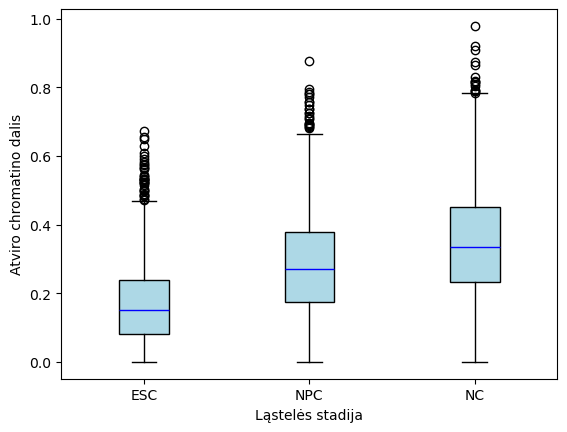

In [112]:
plt.boxplot(highexp[['open_S0', 'open_S1', 'open_S2']],patch_artist=True,
            boxprops=dict(facecolor="lightblue"), medianprops=dict(color="blue"), labels=labels)
plt.ylabel('Atviro chromatino dalis')
plt.xlabel('Ląstelės stadija')

/var/folders/y9/8yssfmz161s4ghy99nf1f2cw0000gn/T/ipykernel_42954/2583397807.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(lowexp[['open_S0', 'open_S1', 'open_S2']],patch_artist=True,


(0.0, 1.0)

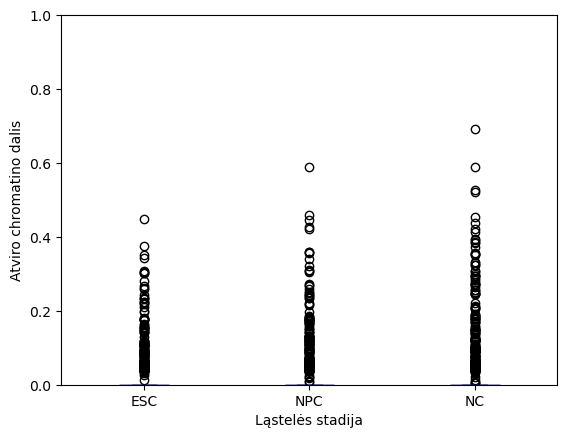

In [114]:
plt.boxplot(lowexp[['open_S0', 'open_S1', 'open_S2']],patch_artist=True,
            boxprops=dict(facecolor="lightblue"), medianprops=dict(color="blue"), labels=labels)

plt.ylabel('Atviro chromatino dalis')
plt.xlabel('Ląstelės stadija')
plt.ylim(0, 1)

In [70]:
import seaborn as sns

Text(0.5, 23.52222222222222, 'Ląstelės stadija')

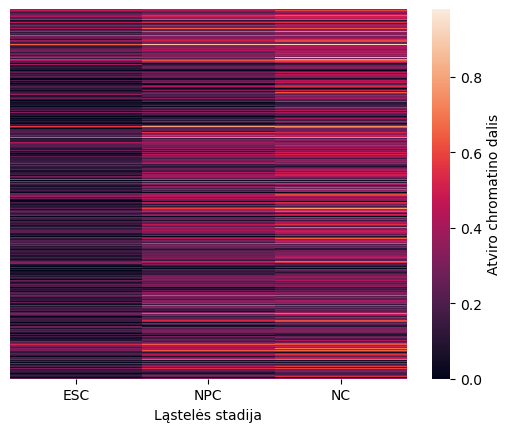

In [86]:
ax = sns.heatmap(highexp[['open_S0', 'open_S1', 'open_S2']], xticklabels=labels, yticklabels=[])
cbar = ax.collections[0].colorbar  # Get the colorbar
cbar.set_label('Atviro chromatino dalis') 
plt.xlabel('Ląstelės stadija')

Text(0.5, 23.52222222222222, 'Ląstelės stadija')

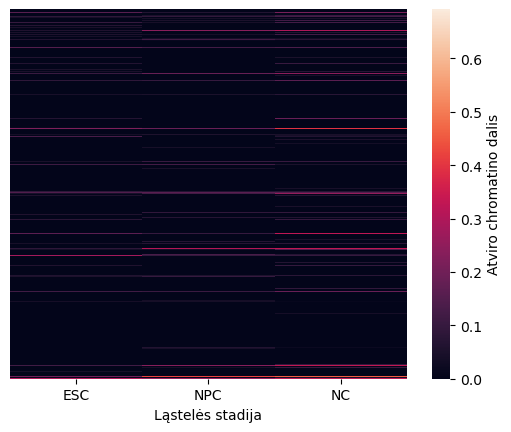

In [87]:
ax = sns.heatmap(lowexp[['open_S0', 'open_S1', 'open_S2']], xticklabels=labels, yticklabels=[])
cbar = ax.collections[0].colorbar  # Get the colorbar
cbar.set_label('Atviro chromatino dalis') 
plt.xlabel('Ląstelės stadija')

In [89]:
highexp.describe()

,open_S0,open_S1,open_S2
count,2200.000000,2200.000000,2200.000000
mean,0.168540,0.280155,0.344298
std,0.118121,0.155571,0.168555
min,0.000000,0.000000,0.000000
25%,0.081375,0.175000,0.232500
50%,0.152500,0.270250,0.335000
75%,0.237500,0.377500,0.452500
max,0.672500,0.876500,0.979000


In [91]:
f = pd.read_csv('../inputs/fpkm.tsv', sep='\t')

In [93]:
f.describe()

,S0_R1,S0_R2,S1_R1,S1_R2,S2_R1,S2_R2
count,20803.000000,20803.000000,20803.000000,20803.000000,20803.000000,20803.000000
mean,20.820032,23.230319,18.613727,18.250311,17.222837,16.177569
std,89.605855,104.604348,78.266240,72.576787,56.530845,48.249700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.232261,2.035094,2.822350,2.879913,3.552050,3.221784
75%,16.919738,17.096706,16.666356,16.922410,17.527053,17.304977
max,5516.512487,5933.508803,5066.806447,4400.488641,2946.349212,2265.742906


In [98]:
f2 = pd.read_csv('../outputs/genes_highexp.tsv', sep='\t')

In [99]:
f2.describe()

,S0_R1,S0_R2,S1_R1,S1_R2,S2_R1,S2_R2,Chromosome,Start,End,level,...,transcript_type,transcript_name,transcript_support_level,havana_transcript,exon_number,exon_id,protein_id,ccdsid,ont,total
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2.200000e+03,2.200000e+03,2200.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2200.000000
mean,57.779155,64.878419,51.013058,49.588701,45.056707,42.679855,7.595000,7.985756e+07,7.990404e+07,1.918182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,310.995894
std,139.949953,162.315454,119.421160,110.187587,79.444718,65.453484,5.472663,4.519176e+07,4.518858e+07,0.280707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,639.069682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.114223e+06,3.198859e+06,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.002727
25%,15.606648,15.613161,16.464355,16.471618,16.185500,16.307637,2.000000,3.588946e+07,3.589624e+07,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.574554
50%,27.131023,27.895633,25.762871,25.606574,25.946072,25.409204,6.000000,8.062004e+07,8.065071e+07,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.709814
75%,51.920525,58.076943,46.209743,45.642230,44.431572,44.205520,12.000000,1.137901e+08,1.138340e+08,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,287.712597
max,2468.387321,2744.607963,1928.724579,1707.268165,1422.293803,883.664901,17.000000,1.818643e+08,1.818708e+08,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10415.283760


(0.0, 200.0)

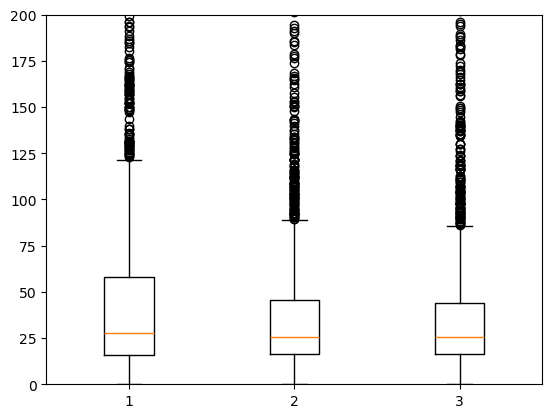

In [111]:
plt.boxplot(f2[['S0_R2', 'S1_R2', 'S2_R2']])
plt.ylim(0, 200)